# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [62]:
# Importa o TensorFlow, uma biblioteca popular para aprendizado de máquina e redes neurais.
import tensorflow as tf 

# Importa o Keras, que é uma API de alto nível para construir e treinar modelos, integrado ao TensorFlow.
import keras 

# Importa o Matplotlib, usado para visualização de dados e gráficos.
import matplotlib 

# Importa o NumPy, uma biblioteca fundamental para operações matemáticas e manipulação de arrays.
import numpy as np


In [110]:
# Importa o conjunto de dados MNIST, que contém imagens de dígitos escritos à mão (0-9).
from tensorflow.keras.datasets import mnist 

# Importa a classe Sequential para criar modelos de rede neural sequenciais (camada a camada).
from tensorflow.keras.models import Sequential 

# Importa diversas camadas que podem ser usadas no modelo:
# InputLayer: Define a camada de entrada.
# Dense: Camada totalmente conectada.
# Flatten: Transforma entradas multidimensionais em vetores.
# Dropout: Desativa aleatoriamente uma fração dos neurônios durante o treinamento para evitar overfitting.
# Conv2D: Camada de convolução para processamento de imagens.
# MaxPooling2D: Camada de pooling para redução dimensional.
# BatchNormalization: Normaliza as ativações em uma camada para estabilizar e acelerar o treinamento.
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization 

# Importa o módulo utils do Keras (com alias np_utils) para ferramentas úteis, como manipulação de rótulos.
from tensorflow.keras import utils as np_utils 

# Importa a funcionalidade pyplot do Matplotlib, usada para plotar gráficos e visualizações de dados.
import matplotlib.pyplot as plt


In [112]:
# Carrega o conjunto de dados MNIST.
# O método `load_data` retorna dois conjuntos: treinamento e teste.
# Cada conjunto é dividido em dados de entrada (imagens) e rótulos (números correspondentes às imagens).
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()


In [113]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [114]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [115]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

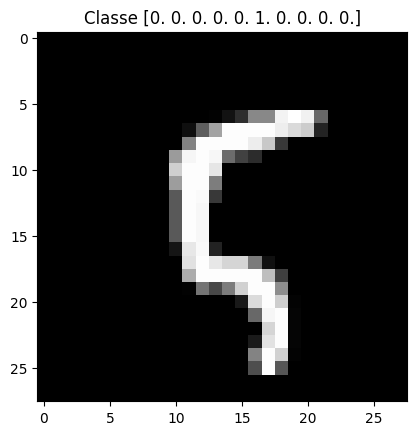

In [159]:
# Exibe a imagem de índice 100 do conjunto de treinamento.
# A função `imshow` do Matplotlib é usada para mostrar a matriz de pixels como uma imagem.
# O parâmetro `cmap='gray'` define a paleta de cores como tons de cinza, já que as imagens do MNIST são em escala de cinza.
plt.imshow(X_treinamento[100], cmap='gray')

# Define o título do gráfico como a classe (rótulo) correspondente à imagem.
# `y_treinamento[100]` contém o número associado à imagem (por exemplo, 0 a 9).
plt.title('Classe ' + str(y_treinamento[100]))


In [117]:
X_treinamento.shape

(60000, 28, 28)

In [160]:
# Redimensiona o conjunto de treinamento para incluir uma dimensão de canal.
# `X_treinamento.shape[0]` é o número de amostras (imagens) no conjunto de treinamento.
# `28, 28` são as dimensões das imagens do MNIST (28x28 pixels).
# `1` é a nova dimensão do canal, necessária para trabalhar com redes neurais convolucionais, 
# que esperam entradas no formato (amostras, altura, largura, canais).
# Como as imagens do MNIST são em escala de cinza, o número de canais é 1.
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)


In [161]:
# Redimensiona o conjunto de teste para incluir uma dimensão de canal.
# `X_teste.shape[0]` é o número de amostras (imagens) no conjunto de teste.
# `28, 28` são as dimensões das imagens (28x28 pixels).
# `1` é a nova dimensão do canal, indicando que as imagens possuem apenas um canal (escala de cinza).
# Isso torna o conjunto de teste compatível com a entrada esperada pelas redes convolucionais,
# que utilizam o formato (amostras, altura, largura, canais).
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)


In [123]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [124]:
# Converte os valores de `X_treinamento` para o tipo `float32`.
# Isso é necessário porque, originalmente, os dados das imagens são armazenados como inteiros (inteiros sem sinal de 8 bits, `uint8`).
# A conversão para `float32` é importante para cálculos em redes neurais, 
# que geralmente exigem precisão em ponto flutuante para realizar operações matemáticas durante o treinamento.
X_treinamento = X_treinamento.astype('float32')


In [125]:
# Converte os valores de `X_teste` para o tipo `float32`.
# Assim como o conjunto de treinamento, os dados do conjunto de teste originalmente são armazenados como inteiros (`uint8`).
# A conversão para `float32` é necessária para garantir compatibilidade com as operações de ponto flutuante 
# realizadas durante o treinamento e a avaliação do modelo.
X_teste = X_teste.astype('float32')


In [126]:
X_treinamento /= 255
X_teste /= 255

In [127]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [128]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [162]:
# Converte os rótulos de `y_treinamento` em codificação one-hot.
# `to_categorical` transforma cada rótulo (inteiro de 0 a 9) em um vetor de 10 posições, 
# onde a posição correspondente ao valor do rótulo é marcada com 1, e as demais com 0.
# Isso é necessário porque redes neurais classificadoras geralmente trabalham com vetores one-hot como saída.
# O argumento `10` indica o número total de classes (dígitos de 0 a 9).
y_treinamento = np_utils.to_categorical(y_treinamento, 10)

# Faz o mesmo para os rótulos do conjunto de teste (`y_teste`), convertendo-os para a codificação one-hot.
y_teste = np_utils.to_categorical(y_teste, 10)


In [130]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [131]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [163]:
# Cria um modelo sequencial, onde as camadas são adicionadas uma após a outra.
rede_neural = Sequential()

# Adiciona a camada de entrada ao modelo.
# O formato da entrada é (28, 28, 1), onde 28x28 são as dimensões da imagem e 1 é o número de canais (escala de cinza).
rede_neural.add(InputLayer(shape =(28, 28, 1)))

# Adiciona uma camada convolucional 2D com 32 filtros, onde cada filtro é de tamanho 3x3.
# A função de ativação 'relu' é usada para introduzir não-linearidade.
rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))

# Adiciona uma camada de max pooling 2D com uma janela de pooling de 2x2.
# Isso ajuda a reduzir a dimensionalidade e destaca as características mais importantes da imagem.
rede_neural.add(MaxPooling2D(pool_size = (2, 2)))

# Adiciona uma camada de "flatten", que achata a saída da camada anterior 
# (convertendo a matriz 2D resultante de convolução e pooling em um vetor unidimensional).
rede_neural.add(Flatten())

# Adiciona uma camada densa (totalmente conectada) com 128 unidades e ativação 'relu'.
# Essa camada aprende representações mais complexas dos dados.
rede_neural.add(Dense(units = 128, activation = 'relu'))

# Adiciona a camada de saída com 10 unidades, uma para cada classe (dígitos de 0 a 9).
# A função de ativação 'softmax' é usada para gerar probabilidades para cada classe.
# O modelo irá prever a classe com a maior probabilidade.
rede_neural.add(Dense(units=10, activation='softmax'))


In [134]:
rede_neural.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [164]:
# Compila o modelo, definindo a função de perda, o otimizador e as métricas a serem avaliadas.
# 'categorical_crossentropy' é a função de perda apropriada para problemas de classificação multiclasse,
# pois mede a diferença entre as distribuições de probabilidade preditas (saída da camada softmax) e as reais (rótulos one-hot).
rede_neural.compile(loss = 'categorical_crossentropy', 

                    # 'adam' é um otimizador eficiente que ajusta os parâmetros de forma adaptativa durante o treinamento.
                    optimizer = 'adam', 

                    # 'accuracy' é a métrica que será monitorada durante o treinamento para avaliar o desempenho do modelo.
                    metrics = ['accuracy'])


In [141]:
# Treina o modelo usando o conjunto de dados de treinamento e validação.
# `X_treinamento` e `y_treinamento` são as entradas (imagens) e rótulos (one-hot) de treinamento.
# `batch_size = 128` define o número de amostras processadas antes de atualizar os pesos do modelo.
# `epochs = 15` define o número de vezes que o modelo passará por todo o conjunto de dados de treinamento.
# `validation_data = (X_teste, y_teste)` define os dados de teste a serem usados para validação durante o treinamento,
# permitindo avaliar o desempenho do modelo em dados não vistos.
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, 
                epochs = 15, validation_data = (X_teste, y_teste))


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9944 - loss: 0.0196 - val_accuracy: 0.9851 - val_loss: 0.0470
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9960 - loss: 0.0144 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9973 - loss: 0.0103 - val_accuracy: 0.9861 - val_loss: 0.0456
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9841 - val_loss: 0.0555
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9982 - loss: 0.0069 - val_accuracy: 0.9850 - val_loss: 0.0489
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.9870 - val_loss: 0.0451
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9984 - loss: 0.0049 - val_accuracy: 0.9864 - val_loss: 0.0503
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accu

In [139]:
resultado5 = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0474


In [142]:
resultado15 = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0783


In [143]:
resultado5

[0.04020567983388901, 0.9864000082015991]

In [145]:
resultado15

[0.058447398245334625, 0.9868000149726868]

In [150]:
# Cria um modelo sequencial, onde as camadas são adicionadas uma após a outra.
rede_neural = Sequential()

# Adiciona a camada de entrada ao modelo.
# O formato da entrada é (28, 28, 1), onde 28x28 são as dimensões da imagem e 1 é o número de canais (escala de cinza).
rede_neural.add(InputLayer(shape =(28, 28, 1)))

# Adiciona uma camada convolucional 2D com 32 filtros, onde cada filtro é de tamanho 3x3.
# A função de ativação 'relu' é usada para introduzir não-linearidade.
rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))

# Adiciona uma camada de normalização em lote (BatchNormalization), que ajuda a estabilizar e acelerar o treinamento
# ao normalizar a ativação das camadas.
rede_neural.add(BatchNormalization())

# Adiciona uma camada de max pooling 2D com uma janela de pooling de 2x2.
# Isso reduz a dimensionalidade das imagens e destaca as características mais importantes.
rede_neural.add(MaxPooling2D(pool_size = (2, 2)))

# Adiciona outra camada convolucional 2D com 32 filtros, ativação 'relu', e com 3x3 como tamanho de filtro.
rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))

# Outra camada de normalização em lote para estabilizar ainda mais o treinamento.
rede_neural.add(BatchNormalization())

# Outra camada de max pooling para continuar a redução dimensional.
rede_neural.add(MaxPooling2D(pool_size = (2, 2)))

# Achata a saída da camada anterior (transforma a matriz 2D resultante de convolução e pooling em um vetor unidimensional).
rede_neural.add(Flatten())

# Adiciona uma camada densa com 128 unidades e ativação 'relu'.
# Essa camada aprende representações mais complexas dos dados.
rede_neural.add(Dense(units = 128, activation = 'relu'))

# Adiciona uma camada de dropout com taxa de 20% para evitar overfitting.
# Durante o treinamento, 20% das unidades serão desativadas aleatoriamente.
rede_neural.add(Dropout(0.2))

# Adiciona outra camada densa com 128 unidades e ativação 'relu'.
rede_neural.add(Dense(units = 128, activation = 'relu'))

# Outra camada de dropout para regularização adicional.
rede_neural.add(Dropout(0.2))

# Adiciona a camada de saída com 10 unidades, uma para cada classe (dígitos de 0 a 9).
# A função de ativação 'softmax' é usada para gerar probabilidades para cada classe.
# O modelo irá prever a classe com a maior probabilidade.
rede_neural.add(Dense(units = 10, activation = 'softmax'))


In [151]:
rede_neural.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [152]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [153]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128,
                epochs = 5, validation_data = (X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8576 - loss: 0.4647 - val_accuracy: 0.9642 - val_loss: 0.1199
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9806 - loss: 0.0673 - val_accuracy: 0.9879 - val_loss: 0.0368
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.9893 - val_loss: 0.0355
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9912 - loss: 0.0300 - val_accuracy: 0.9880 - val_loss: 0.0330


In [154]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0408


In [155]:
resultado

[0.03303634002804756, 0.9879999756813049]

In [156]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size=128,
                epochs=15, validation_data=(X_teste, y_teste))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9895 - val_loss: 0.0341
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9926 - loss: 0.0215 - val_accuracy: 0.9907 - val_loss: 0.0328
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9905 - val_loss: 0.0325
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9917 - val_loss: 0.0302
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9895 - val_loss: 0.0362
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9913 - val_loss: 0.0327
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9858 - val_loss: 0.0472
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9954 - loss: 0.0148 - 

In [157]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0332


In [158]:
resultado

[0.02848217822611332, 0.9937000274658203]